In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
import sklearn.decomposition as skde
from sklearn.ensemble import RandomForestClassifier

In [134]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [135]:
mortrainF = pd.read_csv("train_values.csv")
mortrainF.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [137]:
train_test = pd.concat([mortrainF, valtest], axis = 0)
train_test.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [138]:
train_test.shape

(1000000, 22)

In [139]:
train_test.to_csv("train_test.csv", index=False)

In [3]:
mortrainL = pd.read_csv("train_labels.csv")
mortrainL.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [5]:
print("Train Value Size:", mortrainF.shape)
print("Train Label Size:", mortrainL.shape)
print(mortrainL.row_id.unique().shape)

Train Value Size: (500000, 22)
Train Label Size: (500000, 2)
(500000,)


In [10]:
mortrain = pd.concat([mortrainF,mortrainL.accepted], axis=1)

In [9]:
mortrain.iloc[400000:,:].shape

(100000, 23)

In [11]:
mortrain.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [9]:
#plt.hist(mortrain.applicant_income, bins = 10)
#mortrain[mortrain.applicant_income >= 2000].count()
#sns.boxplot(x='applicant_sex', y='applicant_income', data = mortrain)

In [12]:
mortrain.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [13]:
 mortrainL.accepted.value_counts()

1    250114
0    249886
Name: accepted, dtype: int64

In [14]:
mortrainF.msa_md.value_counts().head()

-1      76982
 24     12993
 314    11014
 305    10340
 101    10059
Name: msa_md, dtype: int64

In [15]:
mortrainF.state_code.value_counts().head()

 37    61967
 6     38712
 2     32509
-1     19132
 22    17476
Name: state_code, dtype: int64

In [16]:
mortrainF.county_code.value_counts().head()

-1      20466
 20     17368
 131    16043
 68     15146
 11     14713
Name: county_code, dtype: int64

### Replace -1 with Nan

### Treating missing values 

In [17]:
#USING MEDIAN, because the feature has no order which rules out using nearest neighbor and has a -1 as part of 
#the data points which rules out using mean.
mortrain['msa_md'].median()

192.0

In [18]:
## Replace data points with median values, accounting for mising values coded as '-1'
cols = ['msa_md', 'state_code', 'county_code']
for column in cols:
    mortrain.loc[mortrain[column] == -1, column] = np.nan
# mortrain.head() 

In [19]:
# For missing values coded s -1
mortrain['msa_md'].replace(np.NaN, mortrain['msa_md'].median(),inplace = True)
mortrain['state_code'].replace(np.NaN, mortrain['state_code'].median(),inplace = True)
mortrain['county_code'].replace(np.NaN, mortrain['county_code'].median(),inplace = True)

In [20]:
# For missing values coded as nan
cols = ['applicant_income', 'population',
                            'minority_population_pct', 'ffiecmedian_family_income',
                     'number_of_owner-occupied_units', 
                    'number_of_1_to_4_family_units']
for column in cols:
    mortrain[column].replace(np.NaN, mortrain[column].median(),inplace = True)

In [21]:
mortrain['tract_to_msa_md_income_pct'].replace(np.NaN, mortrain['tract_to_msa_md_income_pct'].mean(),inplace = True)

In [22]:
mortrain.head(10)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18.0,37.0,246.0,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369.0,52.0,299.0,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16.0,10.0,306.0,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305.0,47.0,180.0,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24.0,37.0,20.0,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1
5,5,1,1,3,1,133.0,3,221.0,13.0,55.0,...,51.0,6078.0,4.821,82745.0,96.550,1827.0,2340.0,964,False,1
6,6,3,1,1,1,240.0,3,374.0,28.0,131.0,...,104.0,6068.0,26.427,65282.0,81.068,1863.0,2560.0,5488,False,1
7,7,2,1,1,1,210.0,3,322.0,37.0,35.0,...,55.0,6030.0,78.153,108353.0,59.439,969.0,1601.0,2442,True,1
8,8,1,1,3,2,209.0,3,24.0,37.0,20.0,...,244.0,5151.0,88.156,63414.0,62.813,411.0,481.0,2118,True,1
9,9,1,1,3,1,197.0,3,194.0,9.0,20.0,...,86.0,7916.0,24.893,65927.0,100.000,1861.0,2123.0,3507,False,0


In [23]:
mortrain.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,216.402836,24.760052,150.026950,...,1.462374,100.121312,5396.982356,31.225669,69158.876302,91.832624,1423.172866,1880.147458,3720.121344,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,114.531622,15.204728,95.692775,...,0.677685,147.474440,2667.723303,25.798784,14478.232811,13.887294,721.027517,893.717989,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,121.000000,9.000000,68.000000,...,1.000000,49.000000,3805.000000,11.191000,60071.000000,89.145000,963.000000,1323.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,225.000000,26.000000,133.000000,...,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,112.000000,6379.000000,44.486000,74714.250000,100.000000,1754.000000,2275.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [24]:
mortrain.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

In [25]:
mortrain.shape

(500000, 23)

### Dealing with missing values in test set

In [136]:
valtest = pd.read_csv("test_values.csv")

In [27]:
valtest.shape

(500000, 22)

In [28]:
## Replace data points with median values, accounting for mising values coded as '-1'
cols = ['msa_md', 'state_code', 'county_code']
for column in cols:
    valtest.loc[valtest[column] == -1, column] = np.nan

In [29]:
# For missing values coded s -1
valtest['msa_md'].replace(np.NaN, valtest['msa_md'].median(),inplace = True)
valtest['state_code'].replace(np.NaN,valtest['state_code'].median(),inplace = True)
valtest['county_code'].replace(np.NaN, valtest['county_code'].median(),inplace = True)

In [30]:
# For missing values coded as nan
cols = ['applicant_income', 'population',
                            'minority_population_pct', 'ffiecmedian_family_income',
                     'number_of_owner-occupied_units', 
                    'number_of_1_to_4_family_units']
for column in cols:
    valtest[column].replace(np.NaN, valtest[column].median(),inplace = True)

In [31]:
valtest['tract_to_msa_md_income_pct'].replace(np.NaN, valtest['tract_to_msa_md_income_pct'].mean(),inplace = True)

In [32]:
valtest.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,2,1,3,1,115.0,3,101.0,16.0,276.0,...,1,74.0,6329.0,59.536,69889.0,85.780000,1874.0,2410.0,3791,True
1,1,1,1,1,1,252.0,2,87.0,20.0,68.0,...,1,107.0,2473.0,8.050,65313.0,100.000000,947.0,1214.0,2839,True
2,2,1,1,1,1,270.0,1,223.0,26.0,133.0,...,2,119.0,4975.0,22.955,67514.0,91.813397,1326.0,1753.0,4701,False
3,3,2,1,1,1,179.0,2,376.0,20.0,11.0,...,2,44.0,4795.0,29.676,57766.0,100.000000,1426.0,1765.0,2153,True
4,4,2,1,1,1,36.0,2,254.0,48.0,156.0,...,3,32.0,5246.0,5.110,63332.0,100.000000,1452.0,2092.0,5710,False


In [96]:
#Check for missing values
#(mortrain.astype(np.object) == -1).any()

In [23]:
#(mortrainF.astype(np.object) == ).any()

In [24]:
#mortrainF.applicant_income.isnull()

In [109]:
## Remove rows with missing values, accounting for mising values coded as '-1'
#cols = ['msa_md', 'state_code', 'county_code']
#for column in cols:
#    mortrain.loc[mortrain[column] == -1, column] = np.nan
#mortrain.dropna(axis = 0, inplace = True)
#mortrain.shape    

### Feature Engineering

#### Aggregating categorical variables
Do a frequency count on all categoricals to check for columns with few samples

In [33]:
mortrain.loan_type.value_counts()

1    370827
2     82430
3     39521
4      7222
Name: loan_type, dtype: int64

In [34]:
valtest.loan_type.value_counts()

1    370294
2     83071
3     39462
4      7173
Name: loan_type, dtype: int64

In [35]:
mortrain.property_type.value_counts()

1    478217
2     19741
3      2042
Name: property_type, dtype: int64

In [36]:
valtest.property_type.value_counts()

1    478254
2     19714
3      2032
Name: property_type, dtype: int64

In [37]:
mortrain.loan_purpose.value_counts()

3    242670
1    209265
2     48065
Name: loan_purpose, dtype: int64

In [38]:
valtest.loan_purpose.value_counts()

3    243446
1    208350
2     48204
Name: loan_purpose, dtype: int64

In [39]:
mortrain.occupancy.value_counts()

1    447394
2     50417
3      2189
Name: occupancy, dtype: int64

In [40]:
valtest.occupancy.value_counts()

1    447965
2     49905
3      2130
Name: occupancy, dtype: int64

In [41]:
mortrain.preapproval.value_counts()

3    411109
2     60143
1     28748
Name: preapproval, dtype: int64

#### Ehnicity

In [42]:
mortrain.applicant_ethnicity.value_counts()

2    386061
3     57298
1     50822
4      5819
Name: applicant_ethnicity, dtype: int64

In [43]:
valtest.applicant_ethnicity.value_counts()

2    386693
3     57051
1     50445
4      5811
Name: applicant_ethnicity, dtype: int64

In [44]:
morSex_cats = {1:'1', 2:'2', 3:'3_4', 
             4:'3_4'}
mortrain['applicant_ethnicity'] = [morSex_cats[x] for x in mortrain['applicant_ethnicity']]
mortrain['applicant_ethnicity'].value_counts()

2      386061
3_4     63117
1       50822
Name: applicant_ethnicity, dtype: int64

In [45]:
morSex_cats = {1:'1', 2:'2', 3:'3_4', 
             4:'3_4'}
valtest['applicant_ethnicity'] = [morSex_cats[x] for x in valtest['applicant_ethnicity']]
valtest['applicant_ethnicity'].value_counts()

2      386693
3_4     62862
1       50445
Name: applicant_ethnicity, dtype: int64

In [46]:
mortrain.applicant_race.value_counts()

5    361538
6     59862
3     40495
2     25756
7      5678
1      4332
4      2339
Name: applicant_race, dtype: int64

In [47]:
valtest.applicant_race.value_counts()

5    361432
6     59957
3     40923
2     25538
7      5671
1      4212
4      2267
Name: applicant_race, dtype: int64

#### Applicant_Sex

In [48]:
mortrain.applicant_sex.value_counts()

1    315806
2    142876
3     35643
4      5675
Name: applicant_sex, dtype: int64

In [49]:
valtest.applicant_sex.value_counts()

1    316001
2    142889
3     35452
4      5658
Name: applicant_sex, dtype: int64

In [50]:
morSex_cats = {1:'1', 2:'2', 3:'3_4', 
             4:'3_4'}
mortrain['applicant_sex'] = [morSex_cats[x] for x in mortrain['applicant_sex']]
mortrain['applicant_sex'].value_counts()

1      315806
2      142876
3_4     41318
Name: applicant_sex, dtype: int64

In [51]:
morSex_cats = {1:'1', 2:'2', 3:'3_4', 
             4:'3_4'}
valtest['applicant_sex'] = [morSex_cats[x] for x in valtest['applicant_sex']]
valtest['applicant_sex'].value_counts()

1      316001
2      142889
3_4     41110
Name: applicant_sex, dtype: int64

In [52]:
### Submission Format
subForm = pd.read_csv("submission_format.csv")
subForm.head()

,row_id,accepted
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [53]:
subForm.shape

(500000, 2)

### Data Preparation for Scikit Learn

In [54]:
accepted_counts = mortrain[['row_id', 'accepted']].groupby('accepted').count()
print(accepted_counts)

          row_id
accepted        
0         249886
1         250114


In [55]:
mortrain.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18.0,37.0,246.0,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369.0,52.0,299.0,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16.0,10.0,306.0,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305.0,47.0,180.0,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24.0,37.0,20.0,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


### Train Set

In [56]:
Labels = np.array(mortrain['accepted'])

In [57]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['loan_type', 'property_type', 'loan_purpose', 
                       'occupancy', 'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex']

Features = encode_string(mortrain['co_applicant'])
for col in categorical_columns:
    temp = encode_string(mortrain[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

(500000, 31)


In [58]:
#Concatenate categorical and numeric columns
Features = np.concatenate([Features, np.array(mortrain[['loan_amount', 'msa_md', 
                            'state_code', 'county_code', 'applicant_income', 'population',
                            'minority_population_pct', 'ffiecmedian_family_income',
                    'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 
                    'number_of_1_to_4_family_units', 'lender']])], axis = 1)
print(Features.shape)
print(Features[:2, :])

(500000, 43)
[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 7.0000e+01 1.8000e+01 3.7000e+01 2.4600e+02 2.4000e+01
  6.2030e+03 4.4230e+01 6.0588e+04 5.0933e+01 7.1600e+02 2.6420e+03
  4.5360e+03]
 [1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 1.7800e+02 3.6900e+02 5.2000e+01 2.9900e+02 5.7000e+01
  5.7740e+03 1.5905e+01 5.4821e+04 1.0000e+02 1.6220e+03 2.1080e+03
  2.4580e+03]]


In [59]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100000)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [60]:
#Scale the numeric features
scaler = preprocessing.StandardScaler().fit(X_train[:,31:])
X_train[:,31:] = scaler.transform(X_train[:,31:])
X_test[:,31:] = scaler.transform(X_test[:,31:])
X_train[:2,]

array([[ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -0.19215329,  0.25820098, -1.29902103, -0.48138469,
         0.08442578,  0.50233862, -0.77065527, -0.46665229,  0.58804692,
         0.1002019 ,  0.46510945, -1.54648415],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
   

#### Validation set

In [61]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['loan_type', 'property_type', 'loan_purpose', 
                       'occupancy', 'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex']

valFeatures = encode_string(valtest['co_applicant'])
for col in categorical_columns:
    valtemp = encode_string(valtest[col])
    valFeatures = np.concatenate([valFeatures, valtemp], axis = 1)

print(valFeatures.shape)

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

(500000, 31)


In [62]:
#Concatenate categorical and numeric columns
valFeatures = np.concatenate([valFeatures, np.array(valtest[['loan_amount', 'msa_md', 
                            'state_code', 'county_code', 'applicant_income', 'population',
                            'minority_population_pct', 'ffiecmedian_family_income',
                    'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 
                    'number_of_1_to_4_family_units', 'lender']])], axis = 1)
print(valFeatures.shape)
print(valFeatures[:2, :])

(500000, 43)
[[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 1.1500e+02 1.0100e+02 1.6000e+01 2.7600e+02 7.4000e+01
  6.3290e+03 5.9536e+01 6.9889e+04 8.5780e+01 1.8740e+03 2.4100e+03
  3.7910e+03]
 [0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
  0.0000e+00 2.5200e+02 8.7000e+01 2.0000e+01 6.8000e+01 1.0700e+02
  2.4730e+03 8.0500e+00 6.5313e+04 1.0000e+02 9.4700e+02 1.2140e+03
  2.8390e+03]]


In [63]:
valFeatures[:,31:] = scaler.transform(valFeatures[:,31:])
print(valFeatures[:2, :])

[[ 0.          1.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          1.
   1.          0.          0.          0.          0.          1.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.          0.          1.          0.
   0.         -0.18191678 -1.0076065  -0.57545364  1.31665311 -0.17463881
   0.34715031  1.09908965  0.05036338 -0.43689928  0.62221353  0.59026417
   0.03785247]
 [ 0.          1.          1.          0.          0.          0.
   1.          0.          0.          1.          0.          0.
   1.          0.          0.          0.          1.          0.
   0.          1.          0.          0.          0.          0.
   0.          1.          0.          0.          1.          0.
   0.          0.05181699 -1.12982239 -0.31233822 -0.85771818  0.04456969
  -1.09479214 -0.89833097 -0.26580176  0.58804692 -0.66135352 -0.74620941
  -0.47992592]]


#### Using Random Forest

In [69]:
nr.seed(444)
rf_clf = RandomForestClassifier(n_estimators=40)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
scores = rf_clf.predict(X_test)

In [71]:
print('Accuracy        %0.2f' % sklm.accuracy_score(y_test, scores))

Accuracy        0.68


In [76]:
importance = rf_clf.feature_importances_
#plt.bar(range(4), importance, tick_label = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
#plt.xticks(rotation=90)
#plt.ylabel('Feature importance')
importance> 0.01

array([False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [78]:
Features.shape

(500000, 43)

### Using Reduced Features

In [88]:
newF = Features[:,(9,11,31,32,33,34,35, 36, 37, 38, 39, 40, 41, 42)]

In [89]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(newF.shape[0])
indx = ms.train_test_split(indx, test_size = 100000)
Xtrain = newF[indx[0],:]
ytrain = np.ravel(Labels[indx[0]])
Xtest = newF[indx[1],:]
ytest = np.ravel(Labels[indx[1]])

In [92]:
#Scale the numeric features
scaler = preprocessing.StandardScaler().fit(Xtrain[:,2:])
Xtrain[:,2:] = scaler.transform(Xtrain[:,2:])
Xtest[:,2:] = scaler.transform(Xtest[:,2:])
Xtrain[:2,]

array([[ 1.        ,  0.        , -0.19215329,  0.25820098, -1.29902103,
        -0.48138469,  0.08442578,  0.50233862, -0.77065527, -0.46665229,
         0.58804692,  0.1002019 ,  0.46510945, -1.54648415],
       [ 0.        ,  1.        , -0.12390986, -1.73217216,  0.80590229,
        -0.98316268, -0.34734853,  1.03970151,  2.40397336, -0.50271833,
        -1.35437749, -0.17257341, -0.09585187,  0.8672769 ]])

In [93]:
nr.seed(444)
rfclf = RandomForestClassifier(n_estimators=40)
rfclf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
score = rfclf.predict(Xtest)

In [95]:
print('Accuracy        %0.2f' % sklm.accuracy_score(ytest, score))

Accuracy        0.67


In [96]:
newVal = valFeatures[:,(9,11,31,32,33,34,35, 36, 37, 38, 39, 40, 41, 42)]

In [98]:
newVal[:,2:] = scaler.transform(newVal[:,2:])
print(newVal[:2, :])

[[ 0.          1.         -0.37876229 -1.90587676 -1.73748761 -1.58482382
  -0.67063029 -2.02032004 -1.25594687 -4.77873972 -7.09913771 -1.97534367
  -2.10514619 -2.02511589]
 [ 1.          0.         -0.37876161 -1.90588608 -1.73634915 -1.58506144
  -0.67062062 -2.02032024 -1.25895316 -4.77873972 -7.0938129  -1.97534613
  -2.10514786 -2.02511604]]


In [99]:
valscore = rfclf.predict(newVal)

In [109]:
i = np.array(subForm.row_id)

In [113]:
firstSub = pd.DataFrame(data= valscore, index = i, columns= ["accepted"])

In [118]:
firstSub.reset_index(inplace=True)

In [125]:
#firstSub.columns = ["row_id", "accepted"]
firstSub.drop("level_0", axis = 1,inplace=True)

In [127]:
firstSub.columns = ["row_id", "accepted"]

In [130]:
firstSub.to_csv("firstSubmission.csv", index=False)

In [133]:
f = pd.read_csv("firstSubmission.csv")
f.accepted.value_counts()

0    291650
1    208350
Name: accepted, dtype: int64

### Using Feature Selection

In [57]:
print(Features.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

(500000, 43)
[ True  True  True False False False False False False  True False  True
 False False False False False False False  True False False False False
 False  True False False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True]
(500000, 21)


### Select K-best Features 

In [58]:
## Reshape the Label array
Labels = Labels.reshape(Labels.shape[0],)

## Set folds for nested cross validation
nr.seed(988)
feature_folds = ms.KFold(n_splits=10, shuffle = True)

## Define the model
logistic_mod = linear_model.LogisticRegression() 

## Perform feature selection by CV with high variance features only
nr.seed(6677)
selector = fs.RFECV(estimator = logistic_mod, cv = feature_folds,
                      scoring = 'roc_auc')
selector = selector.fit(Features_reduced, Labels)
selector.support_ 

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [59]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3])

In [60]:
Features_reduced = selector.transform(Features_reduced)
Features_reduced.shape

(500000, 19)

Text(0.5, 0, 'Number of features')

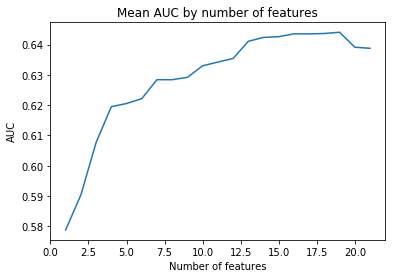

In [61]:
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.title('Mean AUC by number of features')
plt.ylabel('AUC')
plt.xlabel('Number of features')

### Apply Nested Cross Validation

In [62]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [ ]:
nr.seed(498)
cv_estimate = ms.cross_val_score(selector, Features, Labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [139]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100000)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [140]:
X_train[:,31:].shape

(400000, 12)

In [141]:
#Scale the numeric features
scaler = preprocessing.StandardScaler().fit(X_train[:,31:])
X_train[:,31:] = scaler.transform(X_train[:,31:])
X_test[:,31:] = scaler.transform(X_test[:,31:])
X_train[:2,]

array([[ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -0.19215329,  0.25820098, -1.29902103, -0.48138469,
         0.08442578,  0.50233862, -0.77065527, -0.46665229,  0.58804692,
         0.1002019 ,  0.46510945, -1.54648415],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
   

### Using Feature Selection

### Compute principal Components

In [142]:
pca_mod = skde.PCA()
pca_comps = pca_mod.fit(X_train)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [143]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[1.87596841e-01 9.63328083e-02 8.72617260e-02 7.23127559e-02
 6.87326401e-02 6.48513548e-02 5.58629309e-02 5.46403115e-02
 4.95260299e-02 3.95637683e-02 3.67603628e-02 3.42886923e-02
 2.43941428e-02 2.16565135e-02 1.91530952e-02 1.24937670e-02
 1.11541105e-02 1.01185279e-02 8.54143326e-03 7.12091841e-03
 6.44866289e-03 6.15192864e-03 4.80917724e-03 4.60419418e-03
 4.29161088e-03 3.68768534e-03 2.49235580e-03 1.71197095e-03
 1.18473891e-03 8.49078135e-04 6.14636541e-04 3.88498736e-04
 3.06540804e-04 9.61907231e-05 4.62671286e-28 2.69995356e-28
 7.76140723e-29 6.44839855e-29 4.93782369e-29 4.68521321e-29
 4.03801770e-31 6.21258241e-32 2.26377345e-33]
1.0


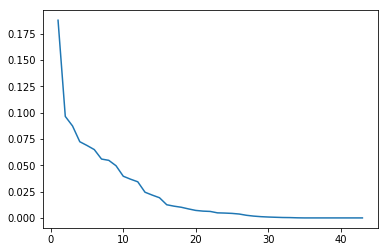

In [144]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)

plot_explained(pca_comps)

In [145]:
pca_mod_5 = skde.PCA(n_components = 5)
pca_mod_5.fit(X_train)
Comps = pca_mod_5.transform(X_train)
Comps.shape

(400000, 5)

In [153]:
## Define and fit the logistic regression model
log_mod_5 = RandomForestClassifier(n_estimators=100, max_depth=2,
                                   random_state=0) 
log_mod_5.fit(Comps, y_train)
#print(log_mod_5.intercept_)
#print(log_mod_5.coef_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [154]:
 print(log_mod_5.feature_importances_)

[0.24505927 0.61711376 0.10649661 0.01535455 0.01597581]


C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 Confusion matrix
                 Score positive    Score negative
Actual positive         0             50058
Actual negative         0             49942

Accuracy        0.50
AUC             0.60
Macro precision 0.25
Macro recall    0.50
 
           Positive      Negative
Num case    50058         49942
Precision    0.00          0.50
Recall       0.00          1.00
F1           0.00          0.67


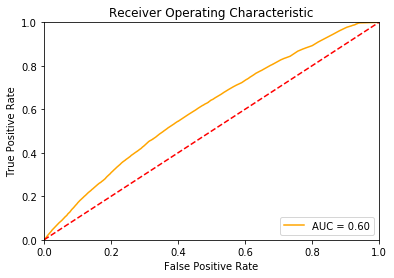

In [155]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = log_mod_5.predict_proba(pca_mod_5.transform(X_test))
print_metrics(y_test, probabilities, 0.3)    
plot_auc(y_test, probabilities)  

### Adding more components

In [148]:
pca_mod_10 = skde.PCA(n_components = 10)
pca_mod_10.fit(X_train)
Comps_10 = pca_mod_10.transform(X_train)
Comps_10.shape

(400000, 10)

In [149]:
## define and fit the linear regression model
log_mod_10 = linear_model.LogisticRegression() 
log_mod_10.fit(Comps_10, y_train)

C:\Users\Grace\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1085             48973
Actual negative       350             49592

Accuracy        0.51
AUC             0.61
Macro precision 0.63
Macro recall    0.51
 
           Positive      Negative
Num case    50058         49942
Precision    0.76          0.50
Recall       0.02          0.99
F1           0.04          0.67


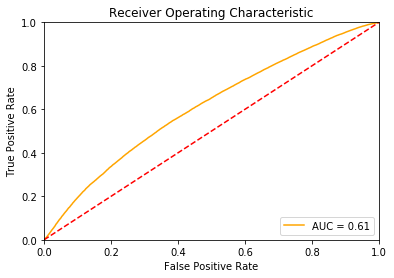

In [150]:
probabilities = log_mod_10.predict_proba(pca_mod_10.transform(X_test))
print_metrics(y_test, probabilities, 0.3)  
plot_auc(y_test, probabilities)   

In [109]:
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))
  
Labels = Labels.reshape(Labels.shape[0],)
scoring = ['precision_macro', 'recall_macro', 'roc_auc']